In [22]:
import os
os.listdir
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [23]:
data = pd.read_csv('data/Salary_Data.csv')

In [24]:
import numpy as np
     
X = data['YearsExperience']
y = data['Salary']
X = X[:,np.newaxis]

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [26]:
model = SVR()
parameters = {
    'kernel': ['rbf'],
    'C':     [1000, 10000, 100000],
    'gamma': [0.5, 0.05,0.005]
}
grid_search = GridSearchCV(model, parameters)
grid_search.fit(X,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1000, 10000, 100000],
                         'gamma': [0.5, 0.05, 0.005], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [27]:
print(grid_search.best_params_)

{'C': 100000, 'gamma': 0.005, 'kernel': 'rbf'}


In [28]:
model_baru  = SVR(C=100000, gamma=0.005, kernel='rbf')
model_baru.fit(X,y)

SVR(C=100000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.005,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

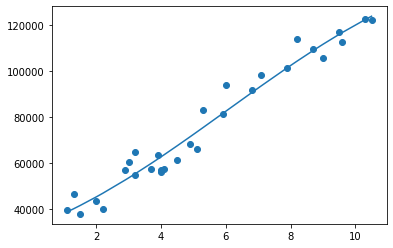

In [29]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, model_baru.predict(X))

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [31]:
model= SVR()
parameters= {
    'kernel': ['rbf'],
    'C': [100,1000,10000,100000],
    'gamma': [0.5, 0.05, 0.005]
}
grid_search= GridSearchCV(model, parameters)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [100, 1000, 10000, 100000],
                         'gamma': [0.5, 0.05, 0.005], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [32]:
print(grid_search.best_params_)

{'C': 100000, 'gamma': 0.5, 'kernel': 'rbf'}


In [33]:
model_baru  = SVR(C=100000, gamma=0.5, kernel='rbf')
model_baru.fit(X_train,y_train)

SVR(C=100000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.5,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [34]:
model_baru.score(X_test, y_test)

0.8746379960694233

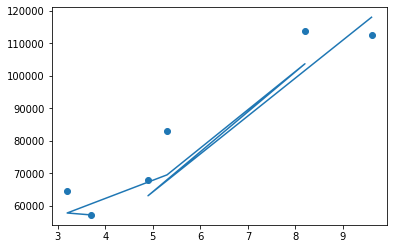

In [35]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test)
plt.plot(X_test, model_baru.predict(X_test))


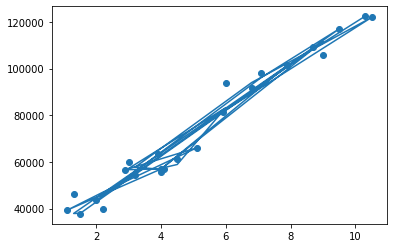

In [36]:
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train)
plt.plot(X_train, model_baru.predict(X_train))